# Importing dataset

In [217]:
import pandas

df = pandas.read_csv('survey lung cancer.csv')
print(df)

    GENDER  AGE  SMOKING  YELLOW_FINGERS  ANXIETY  PEER_PRESSURE  \
0        M   69        1               2        2              1   
1        M   74        2               1        1              1   
2        F   59        1               1        1              2   
3        M   63        2               2        2              1   
4        F   63        1               2        1              1   
..     ...  ...      ...             ...      ...            ...   
304      F   56        1               1        1              2   
305      M   70        2               1        1              1   
306      M   58        2               1        1              1   
307      M   67        2               1        2              1   
308      M   62        1               1        1              2   

     CHRONIC DISEASE  FATIGUE   ALLERGY   WHEEZING  ALCOHOL CONSUMING  \
0                  1         2         1         2                  2   
1                  2         2       

# Data Cleaning

In [218]:
# Remove duplicate rows

'''
print(df.shape)
print(df.duplicated().sum())
df = df.drop_duplicates()
print(df)
print(df.shape)
'''

'\nprint(df.shape)\nprint(df.duplicated().sum())\ndf = df.drop_duplicates()\nprint(df)\nprint(df.shape)\n'

In [219]:
print(df.isnull().sum())

GENDER                   0
AGE                      0
SMOKING                  0
YELLOW_FINGERS           0
ANXIETY                  0
PEER_PRESSURE            0
CHRONIC DISEASE          0
FATIGUE                  0
ALLERGY                  0
WHEEZING                 0
ALCOHOL CONSUMING        0
COUGHING                 0
SHORTNESS OF BREATH      0
SWALLOWING DIFFICULTY    0
CHEST PAIN               0
LUNG_CANCER              0
dtype: int64


In [220]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
df['GENDER'] = le.fit_transform(df['GENDER'])

In [221]:
df['SMOKING'] = le.fit_transform(df['SMOKING'])
df['YELLOW_FINGERS'] = le.fit_transform(df['YELLOW_FINGERS'])
df['ANXIETY'] = le.fit_transform(df['ANXIETY'])
df['PEER_PRESSURE'] = le.fit_transform(df['PEER_PRESSURE'])
df['CHRONIC DISEASE'] = le.fit_transform(df['CHRONIC DISEASE'])
df['FATIGUE '] = le.fit_transform(df['FATIGUE '])
df['ALLERGY '] = le.fit_transform(df['ALLERGY '])
df['WHEEZING'] = le.fit_transform(df['WHEEZING'])
df['ALCOHOL CONSUMING'] = le.fit_transform(df['ALCOHOL CONSUMING'])
df['COUGHING'] = le.fit_transform(df['COUGHING'])
df['SHORTNESS OF BREATH'] = le.fit_transform(df['SHORTNESS OF BREATH'])
df['SWALLOWING DIFFICULTY'] = le.fit_transform(df['SWALLOWING DIFFICULTY'])
df['CHEST PAIN'] = le.fit_transform(df['CHEST PAIN'])

df['LUNG_CANCER'] = le.fit_transform(df['LUNG_CANCER'])
print(df)   #1-male 0-female   1-yes 0-no

     GENDER  AGE  SMOKING  YELLOW_FINGERS  ANXIETY  PEER_PRESSURE  \
0         1   69        0               1        1              0   
1         1   74        1               0        0              0   
2         0   59        0               0        0              1   
3         1   63        1               1        1              0   
4         0   63        0               1        0              0   
..      ...  ...      ...             ...      ...            ...   
304       0   56        0               0        0              1   
305       1   70        1               0        0              0   
306       1   58        1               0        0              0   
307       1   67        1               0        1              0   
308       1   62        0               0        0              1   

     CHRONIC DISEASE  FATIGUE   ALLERGY   WHEEZING  ALCOHOL CONSUMING  \
0                  0         1         0         1                  1   
1                  1     

In [222]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309 entries, 0 to 308
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype
---  ------                 --------------  -----
 0   GENDER                 309 non-null    int32
 1   AGE                    309 non-null    int64
 2   SMOKING                309 non-null    int64
 3   YELLOW_FINGERS         309 non-null    int64
 4   ANXIETY                309 non-null    int64
 5   PEER_PRESSURE          309 non-null    int64
 6   CHRONIC DISEASE        309 non-null    int64
 7   FATIGUE                309 non-null    int64
 8   ALLERGY                309 non-null    int64
 9   WHEEZING               309 non-null    int64
 10  ALCOHOL CONSUMING      309 non-null    int64
 11  COUGHING               309 non-null    int64
 12  SHORTNESS OF BREATH    309 non-null    int64
 13  SWALLOWING DIFFICULTY  309 non-null    int64
 14  CHEST PAIN             309 non-null    int64
 15  LUNG_CANCER            309 non-null    i

In [223]:
print(df.describe())

           GENDER         AGE     SMOKING  YELLOW_FINGERS     ANXIETY  \
count  309.000000  309.000000  309.000000      309.000000  309.000000   
mean     0.524272   62.673139    0.563107        0.569579    0.498382   
std      0.500221    8.210301    0.496806        0.495938    0.500808   
min      0.000000   21.000000    0.000000        0.000000    0.000000   
25%      0.000000   57.000000    0.000000        0.000000    0.000000   
50%      1.000000   62.000000    1.000000        1.000000    0.000000   
75%      1.000000   69.000000    1.000000        1.000000    1.000000   
max      1.000000   87.000000    1.000000        1.000000    1.000000   

       PEER_PRESSURE  CHRONIC DISEASE    FATIGUE     ALLERGY     WHEEZING  \
count     309.000000       309.000000  309.000000  309.000000  309.000000   
mean        0.501618         0.504854    0.673139    0.556634    0.556634   
std         0.500808         0.500787    0.469827    0.497588    0.497588   
min         0.000000         0.000

# Regression Analysis

Logistic Regression using factors: Smoking, Anxiety, Chronic Disease, Allergy, Alcohol Consuming

In [224]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, f1_score

# Logistic regression model with 'SMOKING','ANXIETY','CHRONIC DISEASE', 'ALLERGY ', 'ALCOHOL CONSUMING' factors

X = df[['SMOKING', 'ANXIETY', 'CHRONIC DISEASE', 'ALLERGY ', 'ALCOHOL CONSUMING']]
Y = df['LUNG_CANCER']

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size= 0.2)
lr_model = LogisticRegression()
lr_model.fit(x_train, y_train)
print(lr_model.coef_)

#print(x_test)
y_test_predict = lr_model.predict(x_test)
print(y_test)

lr_cr = classification_report(y_test, y_test_predict)
print(lr_cr)

[[-0.27424811  1.45773529  0.79629659  1.51388354  1.83557693]]
243    1
99     1
276    1
38     1
268    1
      ..
131    1
114    1
56     1
264    1
246    1
Name: LUNG_CANCER, Length: 62, dtype: int32
              precision    recall  f1-score   support

           0       0.50      0.17      0.25        12
           1       0.83      0.96      0.89        50

    accuracy                           0.81        62
   macro avg       0.66      0.56      0.57        62
weighted avg       0.76      0.81      0.77        62



Logistic Regression using factors: Shortness of Breath, Wheezing, Coughing, Allergy, Yellow Fingers

In [225]:
# Logistic regression model with 'SHORTNESS OF BREATH','WHEEZING','COUGHING','ALLERGY ','YELLOW_FINGERS' factors

X = df[['SHORTNESS OF BREATH','WHEEZING','COUGHING','ALLERGY ','YELLOW_FINGERS']]
Y = df['LUNG_CANCER']

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size= 0.2)
lr_model = LogisticRegression()
lr_model.fit(x_train, y_train)
print(lr_model.coef_)

#print(x_test)
y_test_predict = lr_model.predict(x_test)
print(y_test)

lr_cr = classification_report(y_test, y_test_predict)
print(lr_cr)

[[0.11133884 0.7654785  0.78685384 1.94651686 1.52170766]]
268    1
145    1
176    1
80     0
21     1
      ..
59     1
41     1
98     1
132    1
92     1
Name: LUNG_CANCER, Length: 62, dtype: int32
              precision    recall  f1-score   support

           0       1.00      0.33      0.50         9
           1       0.90      1.00      0.95        53

    accuracy                           0.90        62
   macro avg       0.95      0.67      0.72        62
weighted avg       0.91      0.90      0.88        62



Logistic Regression using all given factors

In [226]:
# Logistic regression model with all the factors

temp_list = list(df.columns)
temp_list.remove('LUNG_CANCER')
X = df[temp_list]
Y = df['LUNG_CANCER']

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)
lr_model = LogisticRegression(max_iter=1000)

lr_model.fit(x_train, y_train)
print(lr_model.coef_)

#print(x_test)
y_test_predict = lr_model.predict(x_test)
print(y_test)

lr_cr = classification_report(y_test, y_test_predict)
print(lr_cr)

[[0.02008102 0.02002593 0.44827171 0.69942054 1.0007516  1.30888781
  1.17252801 1.26301352 1.30532923 1.13220143 1.05275602 1.11094636
  0.48244525 1.20944444 0.56294485]]
180    1
27     0
179    1
169    1
284    1
      ..
186    1
264    1
75     1
235    1
10     1
Name: LUNG_CANCER, Length: 62, dtype: int32
              precision    recall  f1-score   support

           0       0.33      0.20      0.25         5
           1       0.93      0.96      0.95        57

    accuracy                           0.90        62
   macro avg       0.63      0.58      0.60        62
weighted avg       0.88      0.90      0.89        62



# Visualizations

<Axes: xlabel='LUNG_CANCER'>

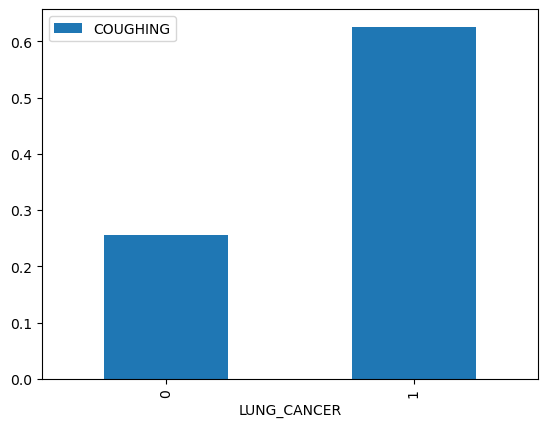

In [227]:
t = df.groupby('LUNG_CANCER').mean()

t.plot.bar(y='COUGHING')

<Axes: xlabel='COUGHING'>

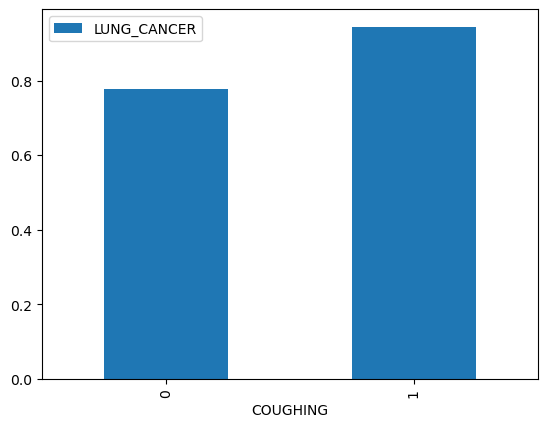

In [228]:
t = df.groupby('COUGHING').mean()

t.plot.bar(y='LUNG_CANCER')